Estimate: 0.4133859631876473
Exact: 0.45156162374600806


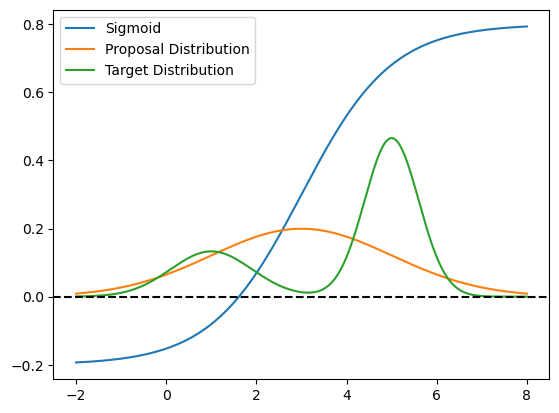

In [112]:
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt
from scipy.stats import norm

np.random.seed(42)

# Define the lower and upper bounds of the integral
lower_bound = -2
upper_bound = 8
# Define the target distribution (Mixture of Gaussians)
def target_distribution(x):
    return 0.3 * norm.pdf(x, 1, 0.9) + 0.7 * norm.pdf(x, 5, .6)

# Define the proposal distribution (Gaussian distribution)
def proposal_distribution(x):
    return norm.pdf(x, 3, 2)

# Define the importance sampling function
def importance_sampling(num_samples):
    samples = np.random.uniform(lower_bound, upper_bound, num_samples)  # Generate samples from the proposal distribution
    weights = target_distribution(samples) / proposal_distribution(samples)  # Compute the importance weights
    weights /= np.sum(weights)  # Normalize the weights
    
    # Estimate the expectation of a function using importance sampling
    def estimate_expectation(func):
        return np.sum(func(samples) * weights)

    return estimate_expectation

def combined(x):
    return target_distribution(x)*sigmoid(x)

# Define the exact solution
def exact_solution():
    return quad(combined, lower_bound, upper_bound)[0]

# Define the sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x+3))-.2

# Perform importance sampling with 10000 samples
estimate = importance_sampling(100)(sigmoid)
exact = exact_solution()

print('Estimate:', estimate)
print('Exact:', exact)

# Print the estimates
x = np.linspace(lower_bound, upper_bound, 1000)  # Define "x" as an array of values
plt.plot(x, sigmoid(x), label='Sigmoid')
plt.plot(x, proposal_distribution(x), label='Proposal Distribution')
plt.plot(x, target_distribution(x), label='Target Distribution')

plt.axhline(y=0, color='black', linestyle='--')

# Add a legend
plt.legend()

plt.savefig('img/importance_sampling.jpg')
# Show the plot
plt.show()